In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import mode

In [79]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_info_columns',500)

In [80]:
df=pd.read_csv('Training.csv').dropna(axis=1)

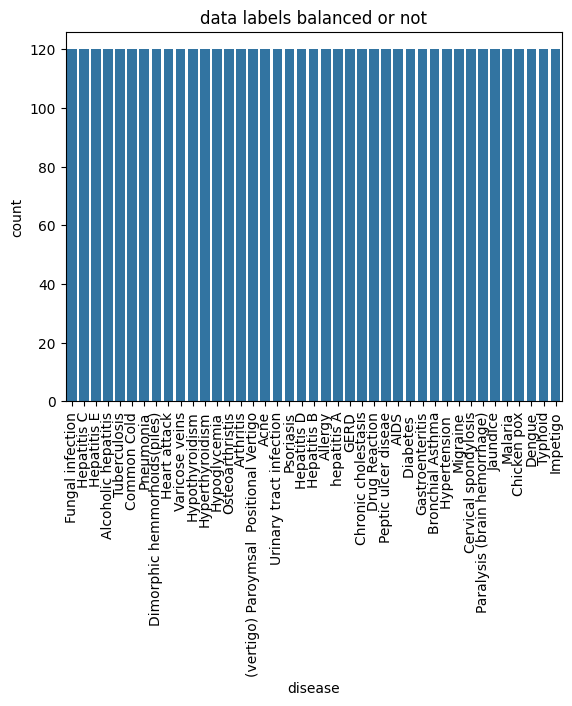

In [81]:
disease_counts=df['prognosis'].value_counts()
temp_df=pd.DataFrame({
    "disease":disease_counts.index,
    "count":disease_counts.values
})
plt.figure()
sns.barplot(x='disease',y='count',data=temp_df)
plt.xticks(rotation=90)
plt.title('data labels balanced or not')
plt.show()

<ipython-input-82-793d1a1753cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat=df.corr()


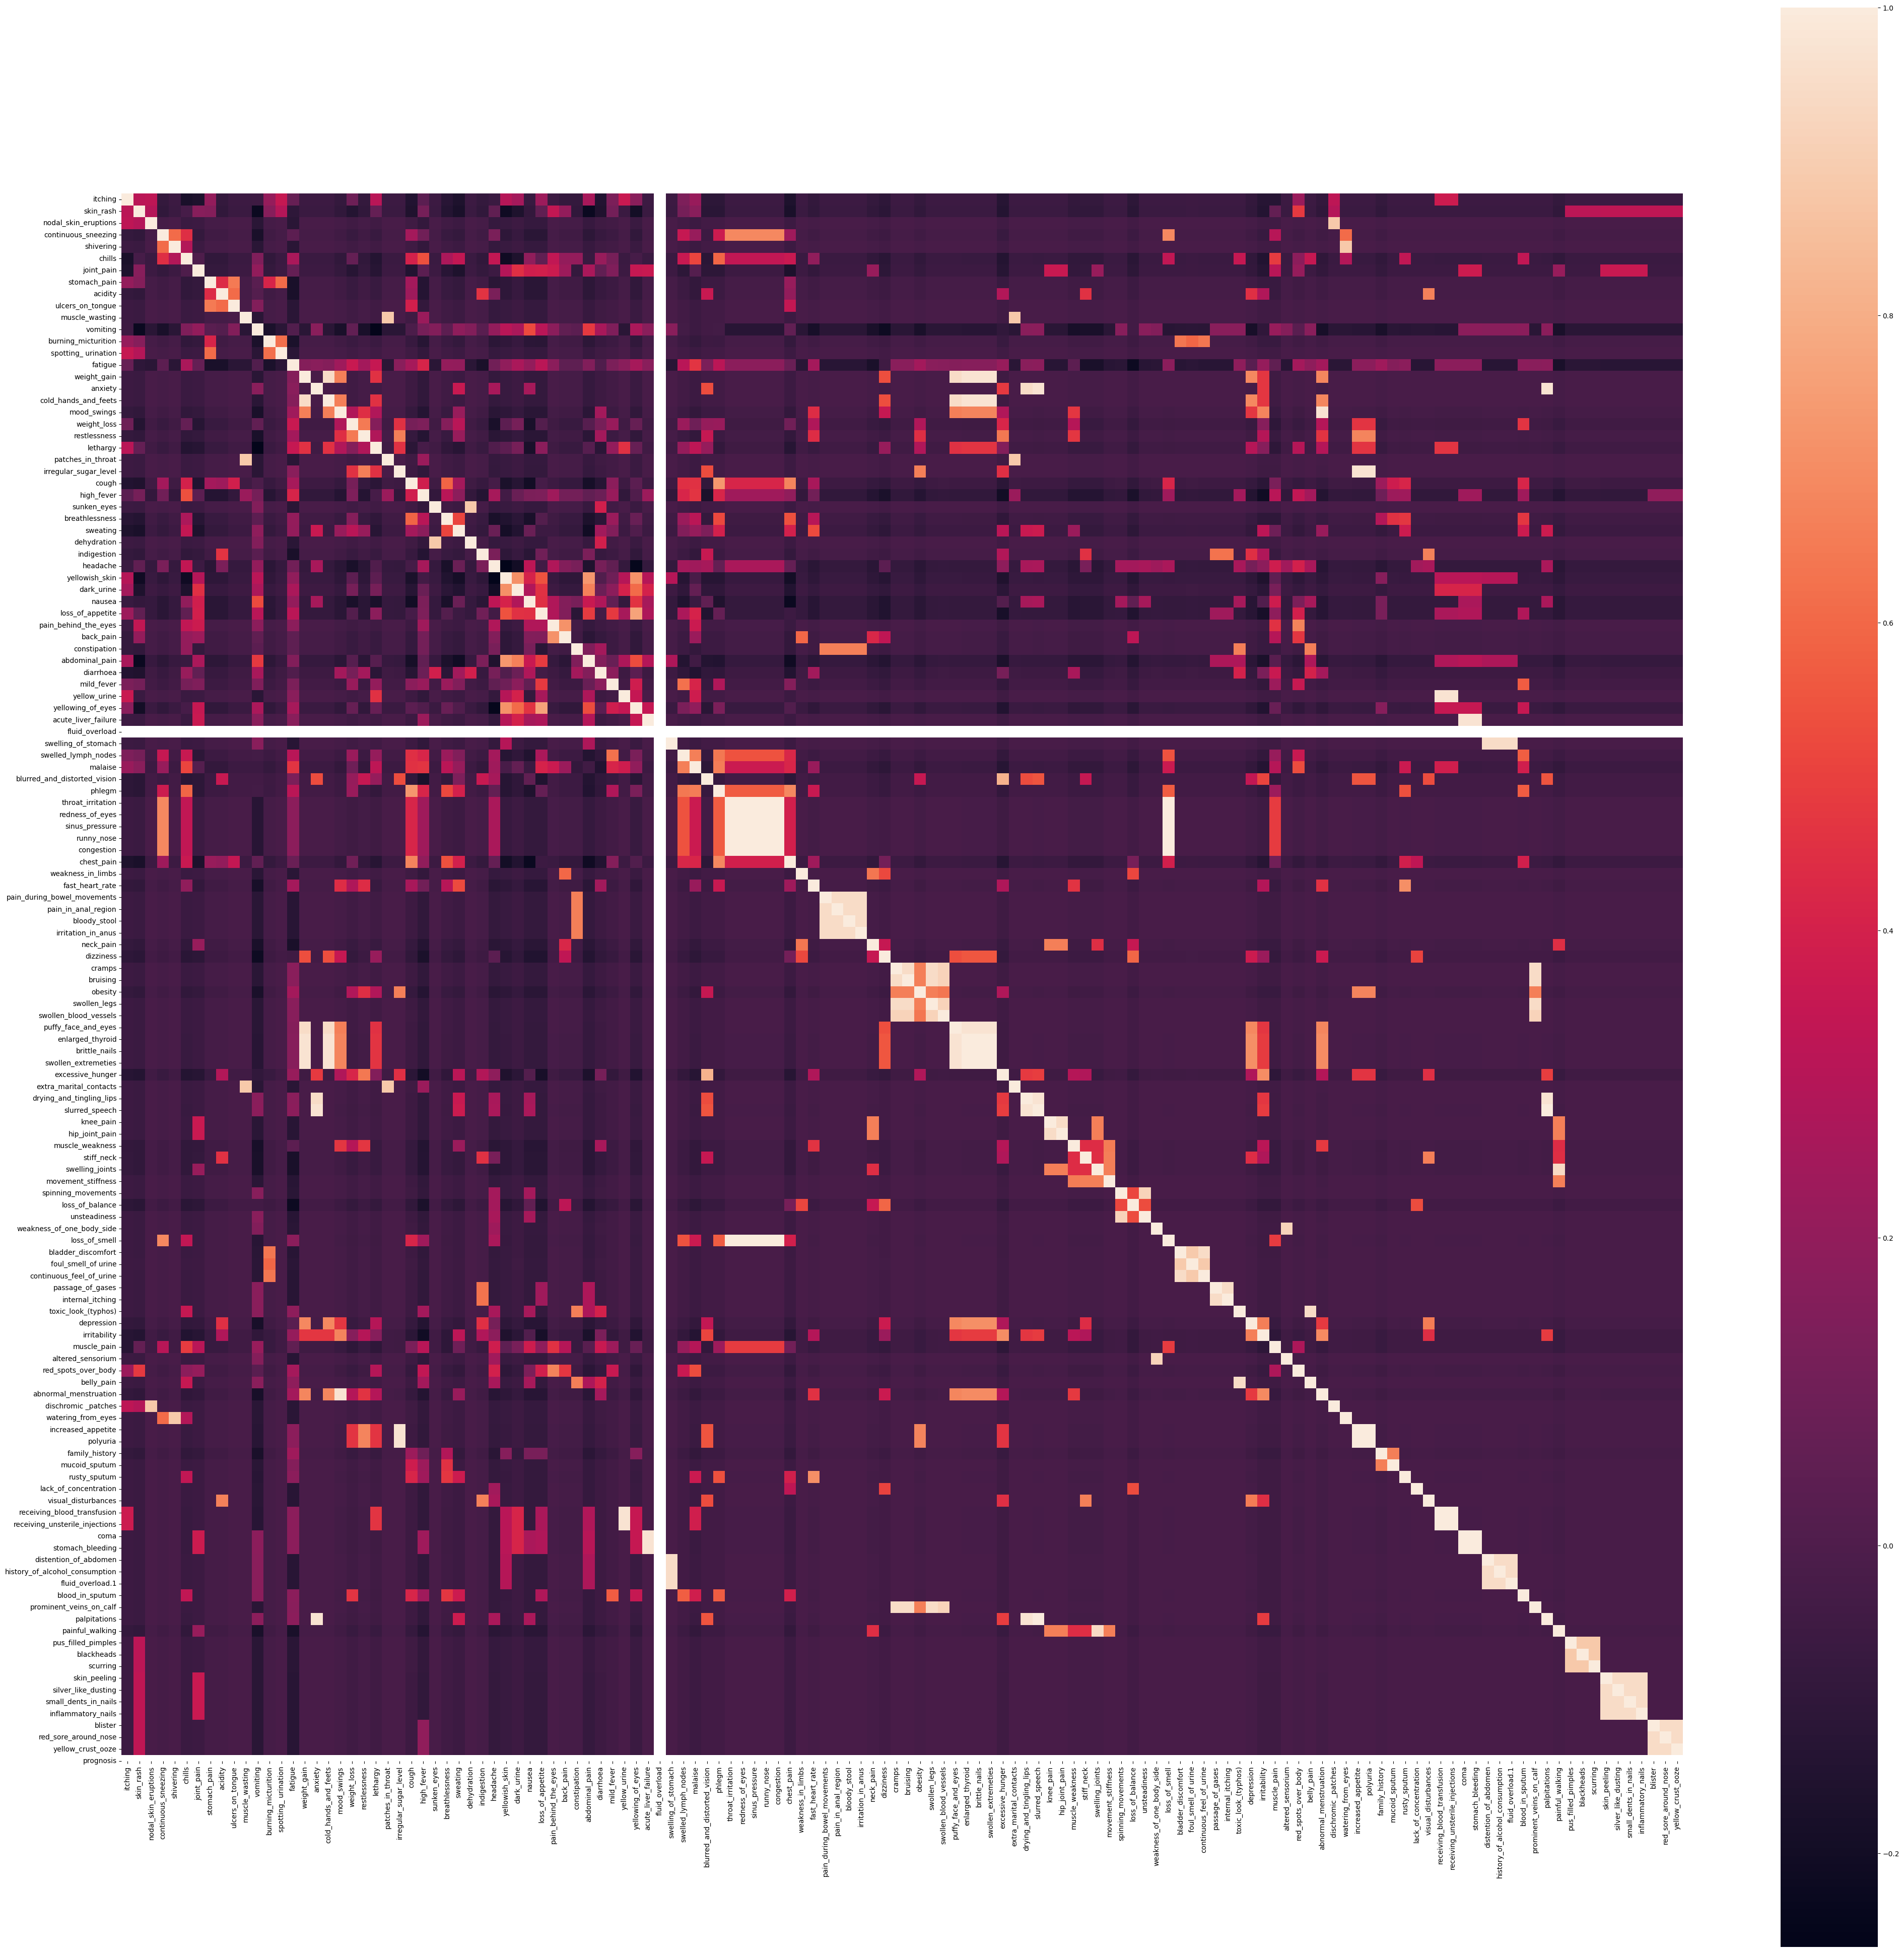

In [82]:
cormat=df.corr()
fig=plt.figure(figsize=(50,50))
sns.heatmap(cormat,square=True,yticklabels=df.columns)
plt.show()

In [83]:

encoder=LabelEncoder()
df['prognosis']=encoder.fit_transform(df['prognosis'])

In [84]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [85]:
def cv_score(estimator,x,y):
  return accuracy_score(y,estimator.predict(x))

models={
    "random_forest":RandomForestClassifier(),
    "guassian_naive_bayes":GaussianNB(),
    "support_vector_classifier":SVC()
}

for model_name in models:
  model=models[model_name]
  scores=cross_val_score(model,X,y,n_jobs=-1,cv=10,scoring=cv_score)
  print("=="*30)
  print(model_name)
  print(scores)
  print(np.mean(scores))

random_forest
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
guassian_naive_bayes
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
support_vector_classifier
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


In [86]:
test_df=pd.read_csv('Testing.csv')

In [87]:
rfc=RandomForestClassifier()
svc=SVC()
nb=GaussianNB()
histrf=rfc.fit(X,y)
histsvc=svc.fit(X,y)
histnb=nb.fit(X,y)

In [113]:
def final_prediction(x):
  return mode([svc.predict(x)[0],rfc.predict(x)[0],nb.predict(x)[0]])

In [112]:
mode([2,2,3])

ModeResult(mode=2, count=2)

In [89]:
X.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 133 columns):
 #    Column                          Non-Null Count  Dtype
---   ------                          --------------  -----
 0    itching                         4920 non-null   int64
 1    skin_rash                       4920 non-null   int64
 2    nodal_skin_eruptions            4920 non-null   int64
 3    continuous_sneezing             4920 non-null   int64
 4    shivering                       4920 non-null   int64
 5    chills                          4920 non-null   int64
 6    joint_pain                      4920 non-null   int64
 7    stomach_pain                    4920 non-null   int64
 8    acidity                         4920 non-null   int64
 9    ulcers_on_tongue                4920 non-null   int64
 10   muscle_wasting                  4920 non-null   int64
 11   vomiting                        4920 non-null   int64
 12   burning_micturition             4920 non-null 

In [91]:
df['prognosis'].unique()

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27])

In [92]:
rfc=RandomForestClassifier()
hist=rfc.fit(X,y)

In [93]:
symptoms=X.columns.values

In [94]:
symptom_index={}
for index,value in enumerate(symptoms):
  symptom=" ".join([i.capitalize() for i in value.split("_")])
  symptom_index[symptom]=index

In [120]:
data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}
def predict_disease(input_symptoms):
  input_symptoms=input_symptoms.split(',')
  input_data=[0]*len(symptoms)
  for sym in input_symptoms:
    index=data_dict["symptom_index"][sym]
    input_data[index]=1

  print(data_dict["predictions_classes"][final_prediction(np.array(input_data).reshape(1,-1))[0]])

In [123]:
predict_disease('Movement Stiffness,Muscle Weakness,Hip Joint Pain')
predict_disease('Bladder Discomfort,Continuous Feel Of Urine,Passage Of Gases')
predict_disease('Internal Itching,Red Spots Over Body,History Of Alcohol Consumption')
predict_disease('Skin Peeling,Silver Like Dusting,Small Dents In Nails,Inflammatory Nails')

Arthritis
Urinary tract infection
Peptic ulcer diseae
Psoriasis


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB

In [97]:
symptom_index

{'Itching': 0,
 'Skin Rash': 1,
 'Nodal Skin Eruptions': 2,
 'Continuous Sneezing': 3,
 'Shivering': 4,
 'Chills': 5,
 'Joint Pain': 6,
 'Stomach Pain': 7,
 'Acidity': 8,
 'Ulcers On Tongue': 9,
 'Muscle Wasting': 10,
 'Vomiting': 11,
 'Burning Micturition': 12,
 'Spotting  urination': 13,
 'Fatigue': 14,
 'Weight Gain': 15,
 'Anxiety': 16,
 'Cold Hands And Feets': 17,
 'Mood Swings': 18,
 'Weight Loss': 19,
 'Restlessness': 20,
 'Lethargy': 21,
 'Patches In Throat': 22,
 'Irregular Sugar Level': 23,
 'Cough': 24,
 'High Fever': 25,
 'Sunken Eyes': 26,
 'Breathlessness': 27,
 'Sweating': 28,
 'Dehydration': 29,
 'Indigestion': 30,
 'Headache': 31,
 'Yellowish Skin': 32,
 'Dark Urine': 33,
 'Nausea': 34,
 'Loss Of Appetite': 35,
 'Pain Behind The Eyes': 36,
 'Back Pain': 37,
 'Constipation': 38,
 'Abdominal Pain': 39,
 'Diarrhoea': 40,
 'Mild Fever': 41,
 'Yellow Urine': 42,
 'Yellowing Of Eyes': 43,
 'Acute Liver Failure': 44,
 'Fluid Overload': 45,
 'Swelling Of Stomach': 46,
 'Swelle

In [ ]:
rfc.predict(np)